## Limpieza de datos

In [1]:
import pandas as pd
import seaborn as sns

C:\Users\Fercho\AppData\Local\Temp\ipykernel_37864\432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data.txt')


In [3]:
data.head()
data = data.drop('date', axis=1)
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
# Especifica el valor y el caracter que deseas eliminar
valor_a_eliminar = 'finishing ' # Reemplaza 'valor_a_eliminar' con el valor específico que deseas filtrar
caracter_a_eliminar = ' '  # Reemplaza 'caracter_a_eliminar' con el caracter que deseas eliminar

# Reemplazar el caracter en las celdas con el valor especificado
data['department'] = data['department'].str.replace(caracter_a_eliminar, '')

# Imprimir el DataFrame actualizado
# print(data)

In [5]:
data['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [6]:
datacopy = data
data_sin_nulos = datacopy.dropna(subset=['wip'])
# Calcular la media de 'wip' para cada combinación de 'department' y 'team'
media_wip_por_combinacion = datacopy.groupby(['department', 'team'])['wip'].mean()

# Imprimir la media de 'wip' por combinación de 'department' y 'team'
print("Media de 'wip' por combinación de 'department' y 'team':")
print(media_wip_por_combinacion)


Media de 'wip' por combinación de 'department' y 'team':
department  team
finishing   1               NaN
            2               NaN
            3               NaN
            4               NaN
            5               NaN
            6               NaN
            7               NaN
            8               NaN
            9               NaN
            10              NaN
            11              NaN
            12              NaN
sweing      1       1609.196429
            2       1326.280702
            3       1409.293103
            4       1218.677966
            5        773.741379
            6        936.559322
            7        999.509091
            8        984.375000
            9       1283.724138
            10      1528.333333
            11       968.135593
            12      1259.915254
Name: wip, dtype: float64


In [7]:
datos_finishing = data[data['department'] == 'finishing']

if datos_finishing['wip'].isnull().all():
    print("Todos los valores en la lista resultante son vacíos.")
else:
    print("Al menos un valor en la lista resultante no es vacío.")


Todos los valores en la lista resultante son vacíos.


In [8]:
# Calcular el valor promedio de 'wip' para cada equipo
promedio_wip_por_equipo = data.groupby('team')['wip'].mean()
promedio_wip_por_equipo

team
1     1609.196429
2     1326.280702
3     1409.293103
4     1218.677966
5      773.741379
6      936.559322
7      999.509091
8      984.375000
9     1283.724138
10    1528.333333
11     968.135593
12    1259.915254
Name: wip, dtype: float64

In [9]:
data.iloc[1,6]

nan

In [10]:
datac = data# Recorrer las filas de la columna 'wip'
for indice, valor_wip in enumerate(datac['wip']):
    # Verificar si el valor de 'wip' en la fila actual es nulo o faltante
    if pd.isnull(valor_wip):
        equipo = datac.iloc[indice, 3]
        media = promedio_wip_por_equipo[equipo]
        print(indice), print(equipo)
        datac.iloc[indice, 6] = media
datac.head(50)
data = datac

1
1
6
2
13
10
14
8
15
4
16
7
18
11
19
4
20
11
21
9
22
3
23
1
33
2
35
10
38
8
39
7
40
3
41
9
42
1
44
4
52
2
53
10
57
8
58
7
60
11
61
1
62
11
63
4
64
3
66
9
67
2
76
10
77
5
80
7
81
8
83
4
84
1
85
3
86
11
87
9
90
10
91
2
101
8
103
7
104
1
105
9
109
3
110
4
111
2
112
10
113
7
122
8
123
6
125
5
126
1
127
4
129
9
134
2
135
5
141
10
142
8
143
3
144
7
145
11
148
1
149
3
150
4
151
9
155
10
156
11
157
2
166
7
167
8
169
5
170
3
171
4
173
1
174
9
178
10
179
2
185
11
186
8
187
5
189
6
190
7
193
1
194
4
195
3
196
2
197
9
202
6
203
5
208
8
212
7
213
11
215
10
216
4
217
1
218
10
219
3
220
9
225
5
226
2
231
8
232
7
233
11
238
11
239
4
241
1
242
5
243
9
246
7
247
3
252
8
256
10
258
2
259
4
260
10
261
1
262
5
263
9
271
7
274
8
278
5
279
2
280
10
281
1
282
9
291
8
292
7
296
6
298
11
299
5
300
11
301
6
308
7
313
8
315
9
317
10
318
4
319
9
320
5
324
12
330
8
334
10
335
11
337
5
345
9
348
8
351
11
352
4
353
2
356
9
360
5
366
8
368
1
370
11
371
7
372
10
379
5
382
4
383
1
384
2
385
6
390
3
391
8
392
12
393
5
3

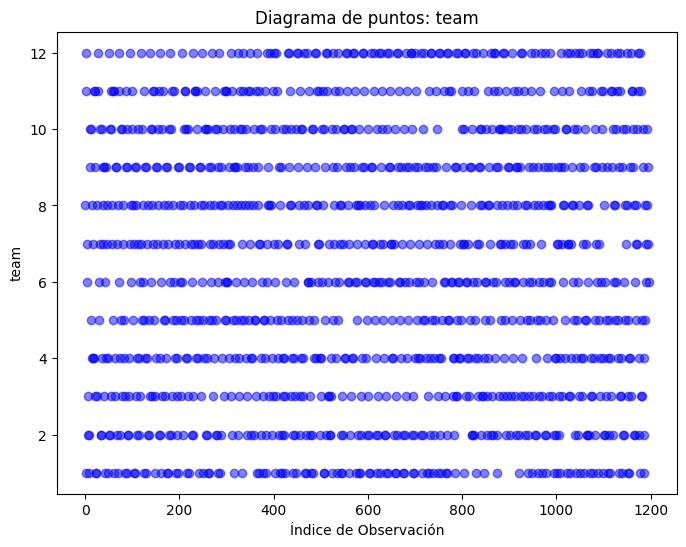

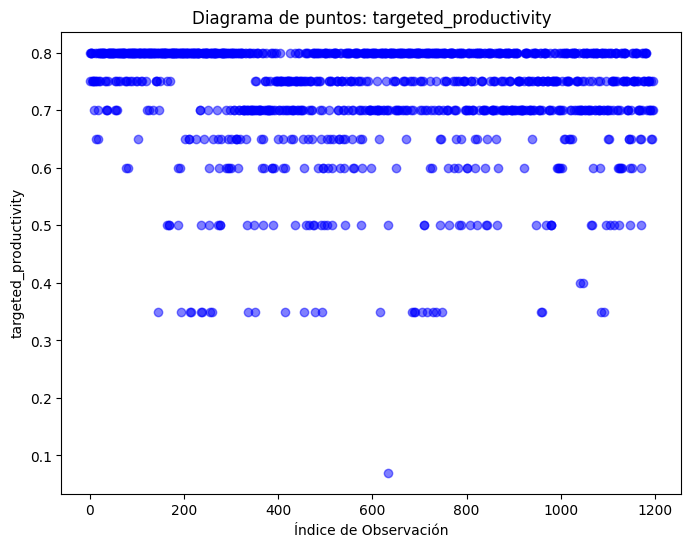

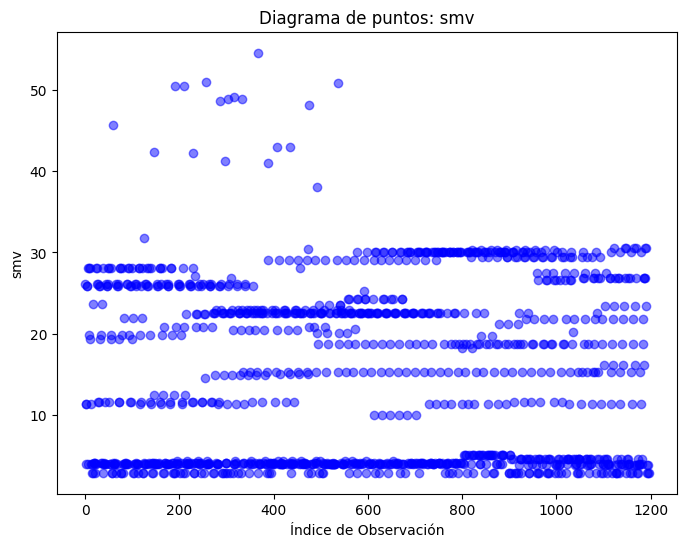

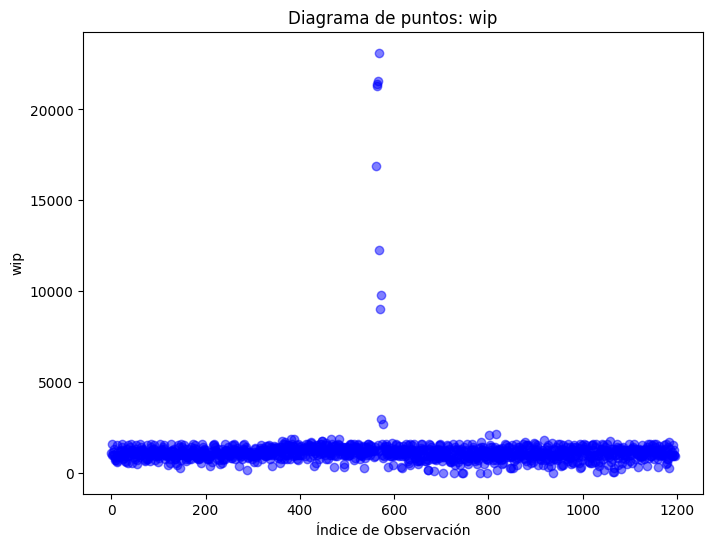

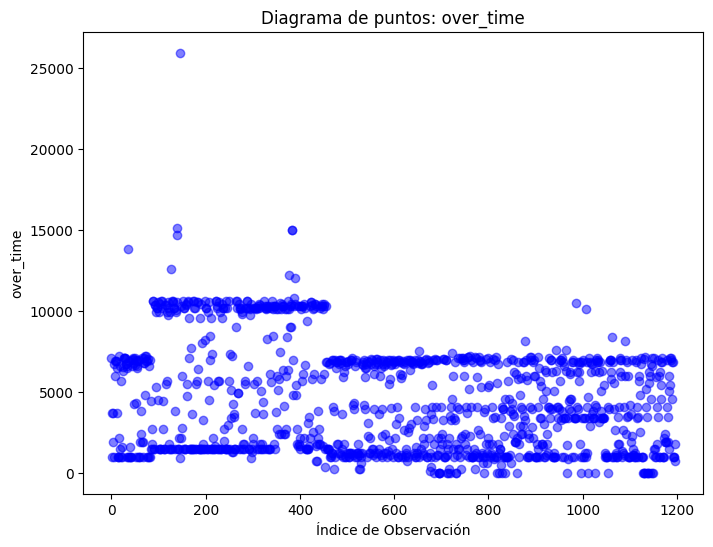

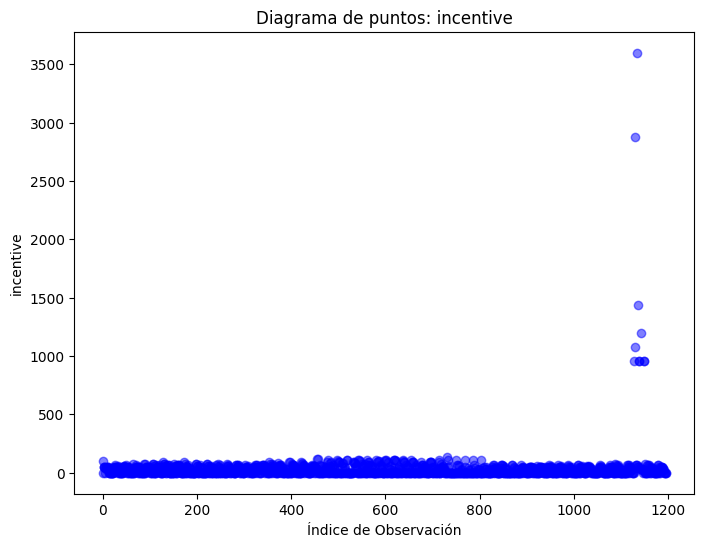

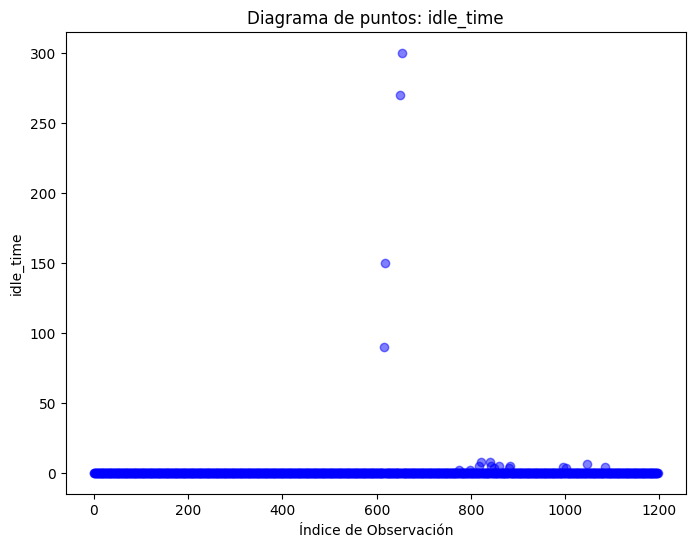

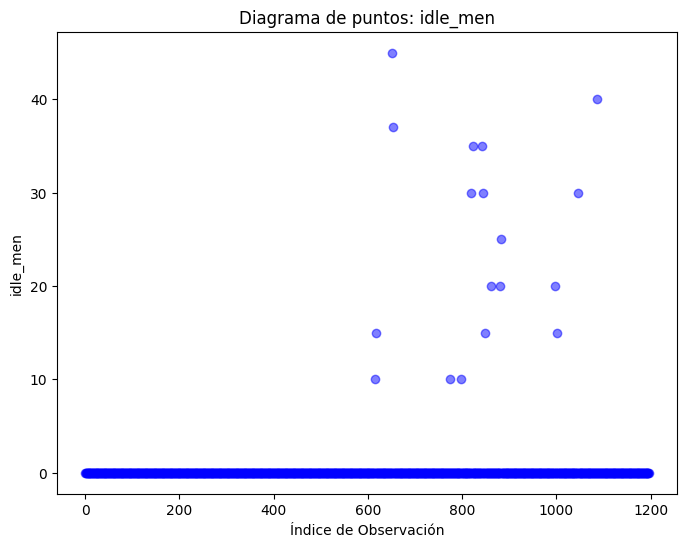

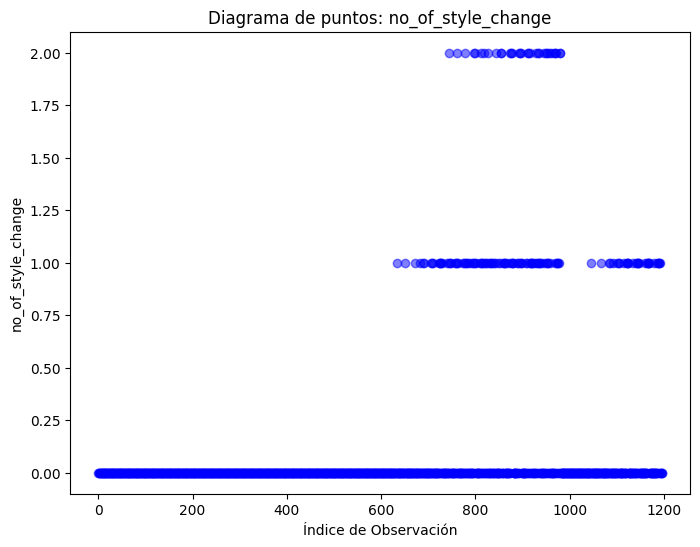

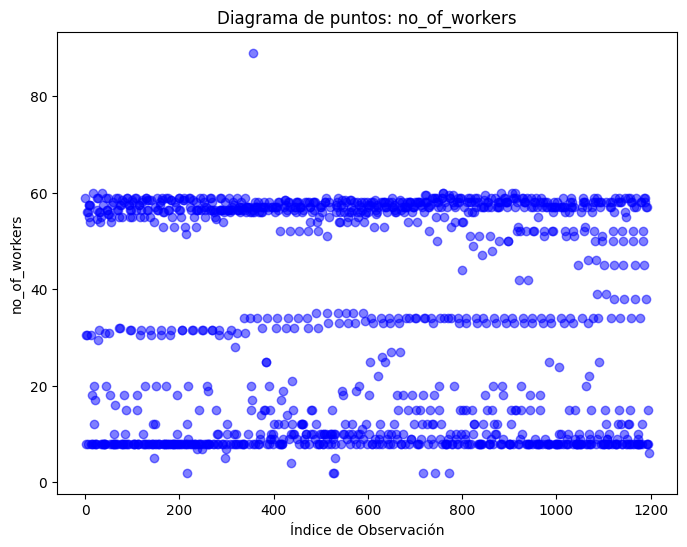

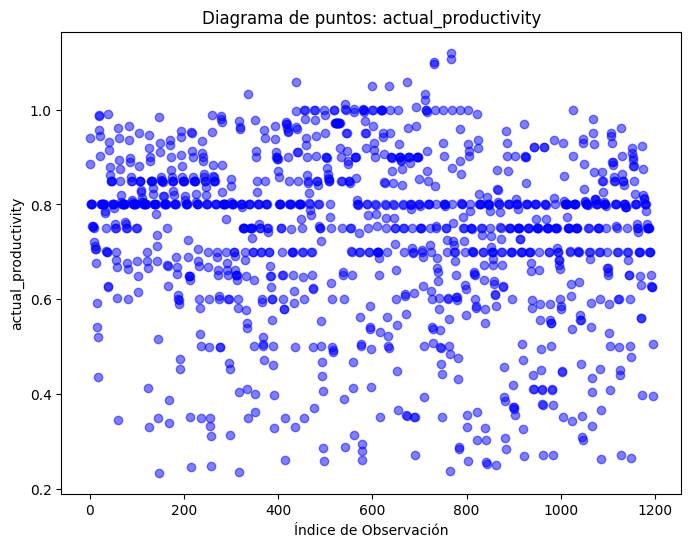

In [11]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar diagrama de puntos para cada variable numérica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column], alpha=0.5, color='blue')
    plt.title(f'Diagrama de puntos: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

## Exploración de datos

In [12]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1198.735765,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1404.692047,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,925.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1096.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1326.280702,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [13]:
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1609.196429,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [14]:
import seaborn as sns

In [15]:
%matplotlib inline

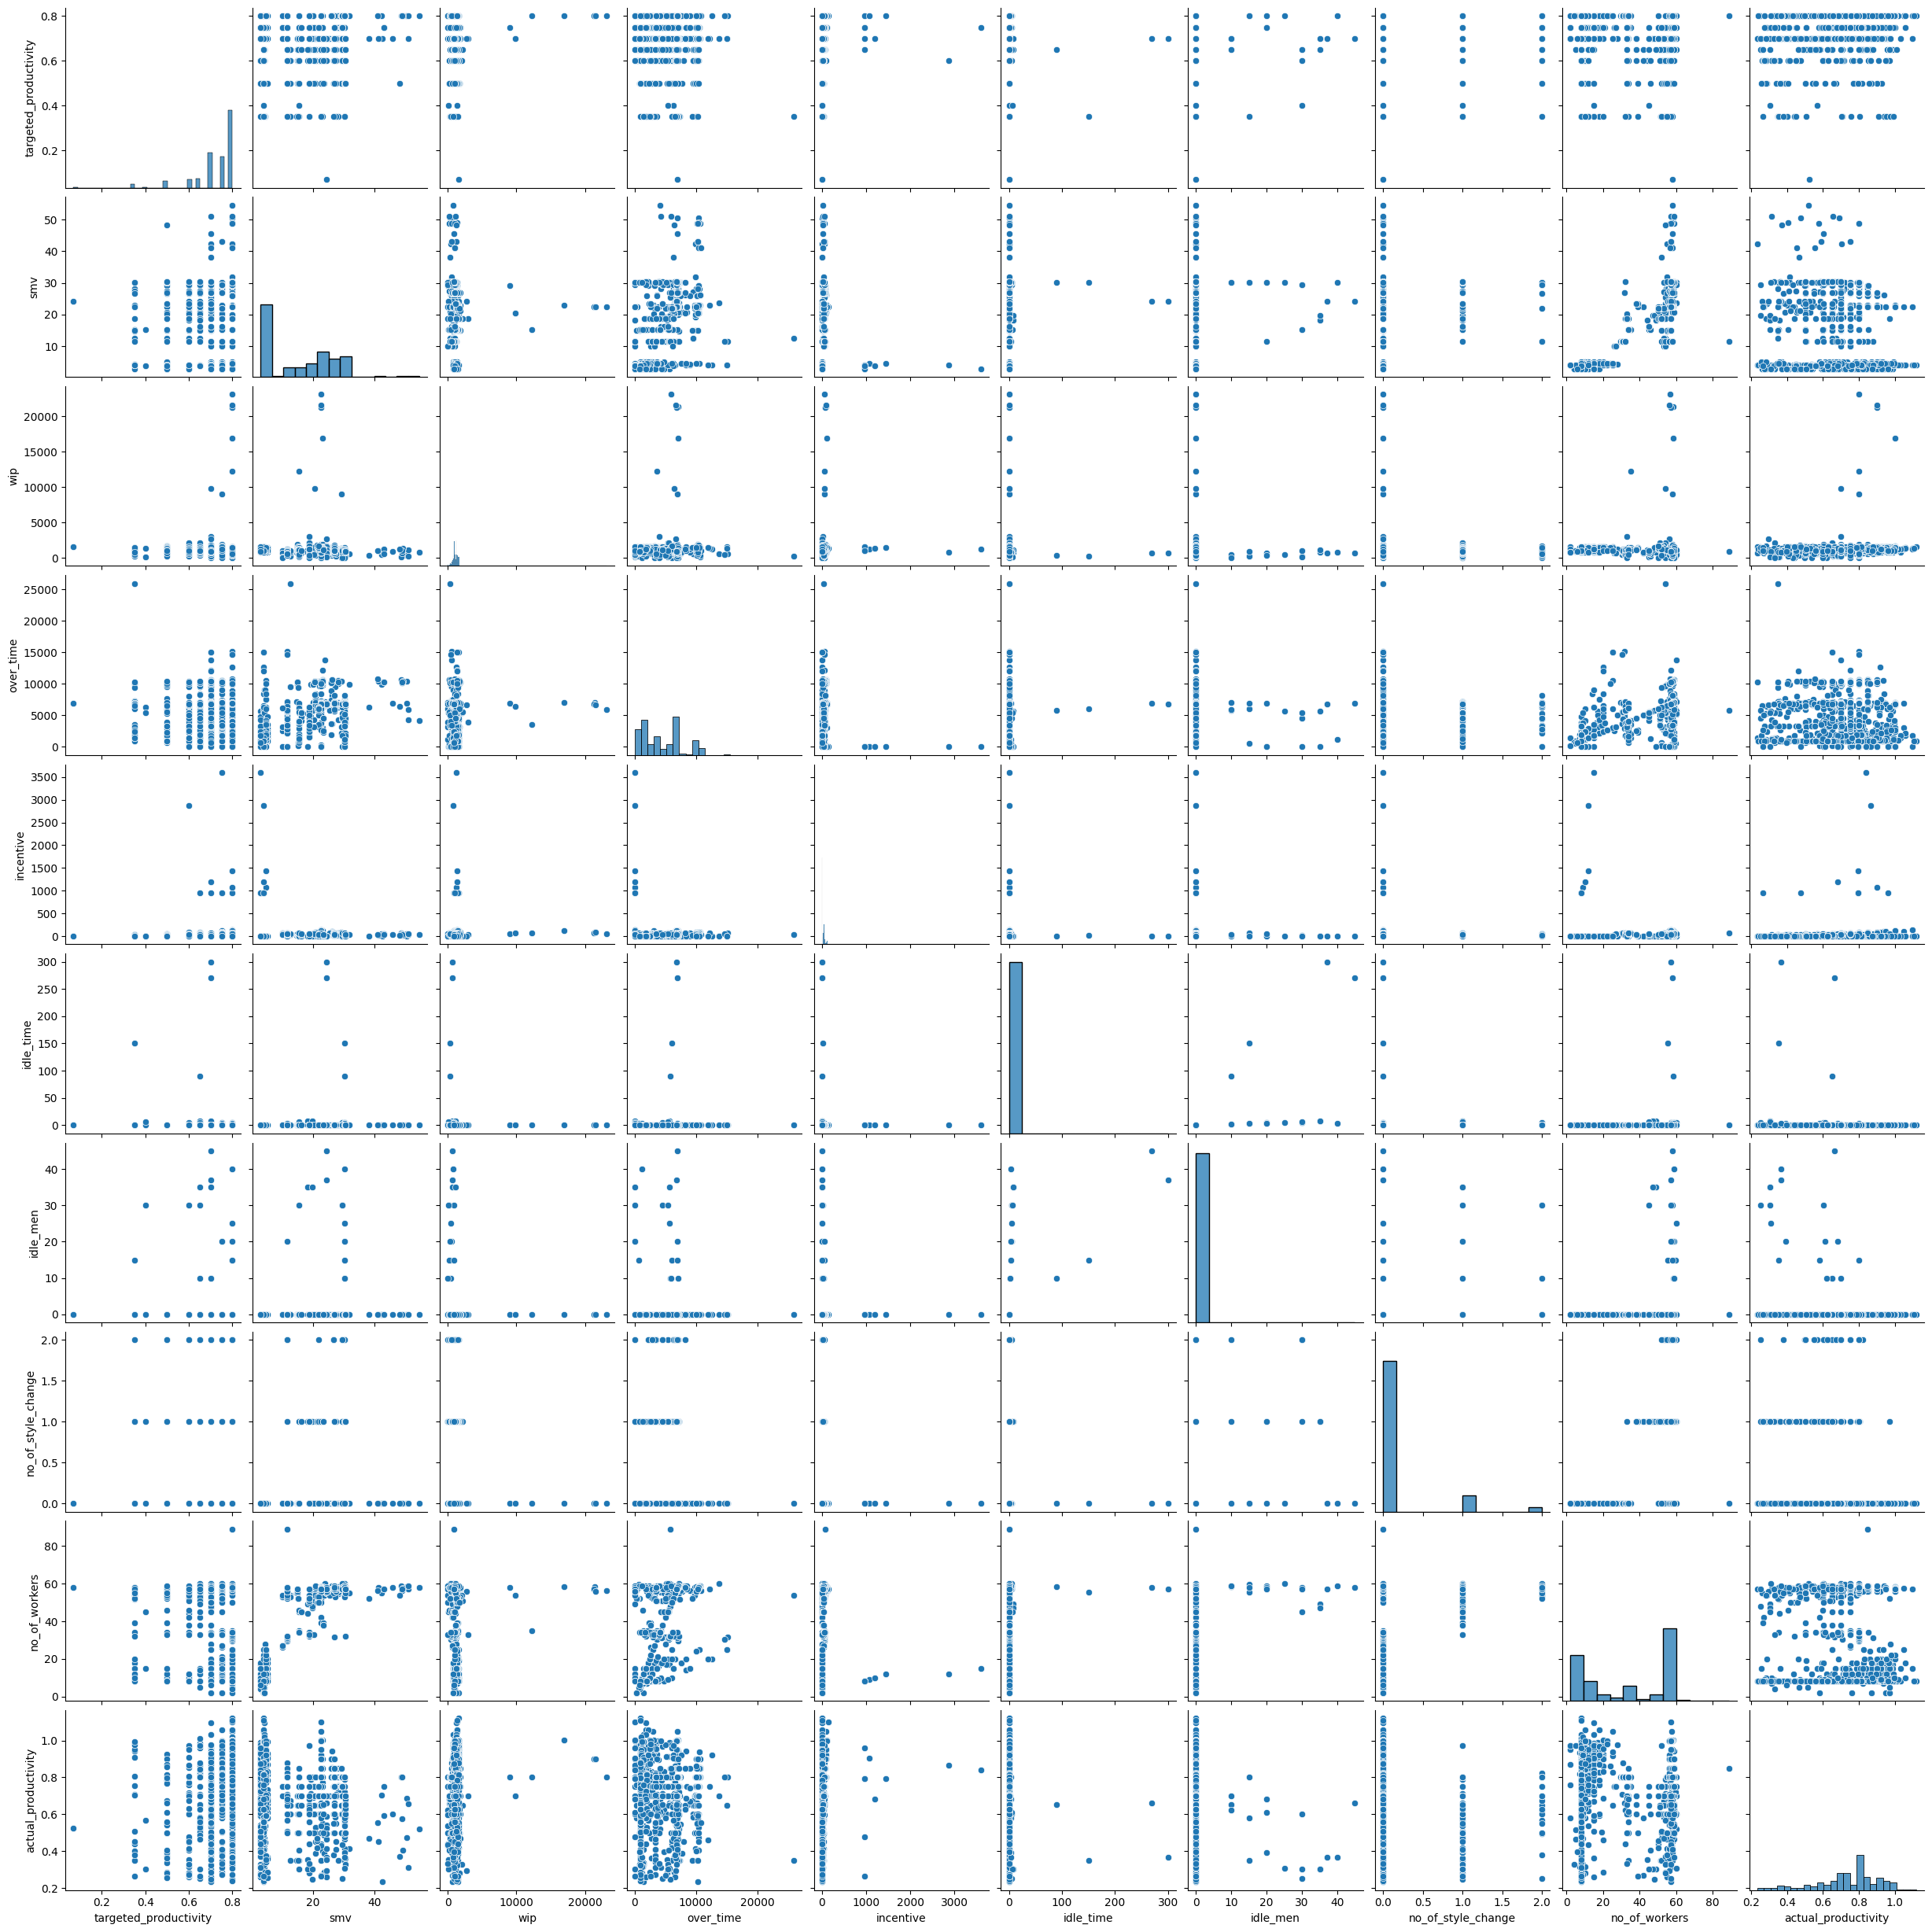

In [16]:
features=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers","actual_productivity"]
data_filtered=data[features]

sns.pairplot(data_filtered,)

Matriz de correlación

<Axes: >

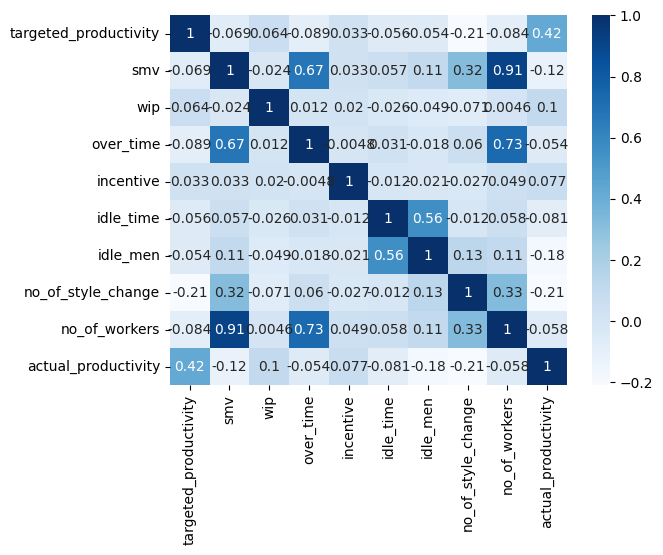

In [17]:
import seaborn as sb
corr = data_filtered.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

Gráficos de violín

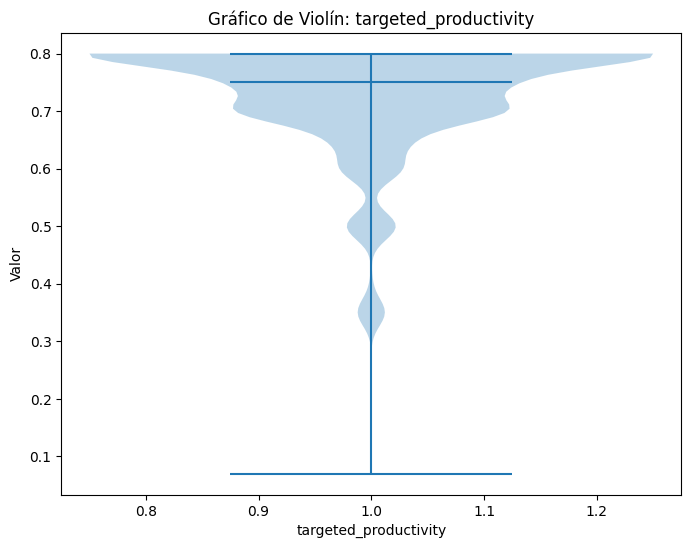

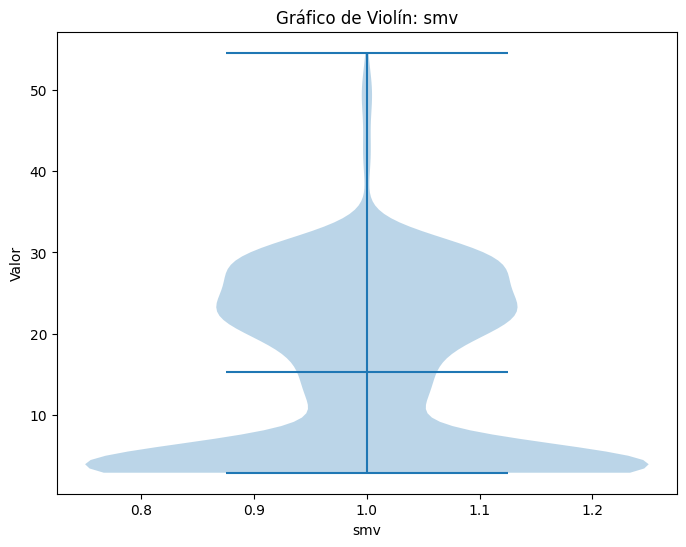

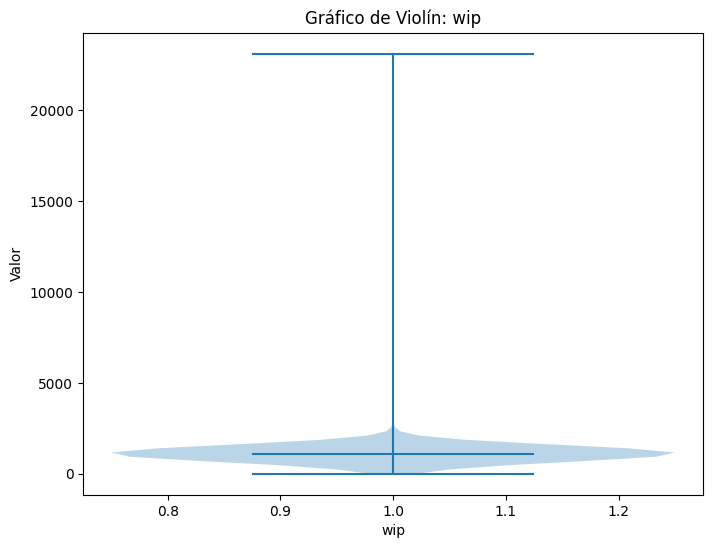

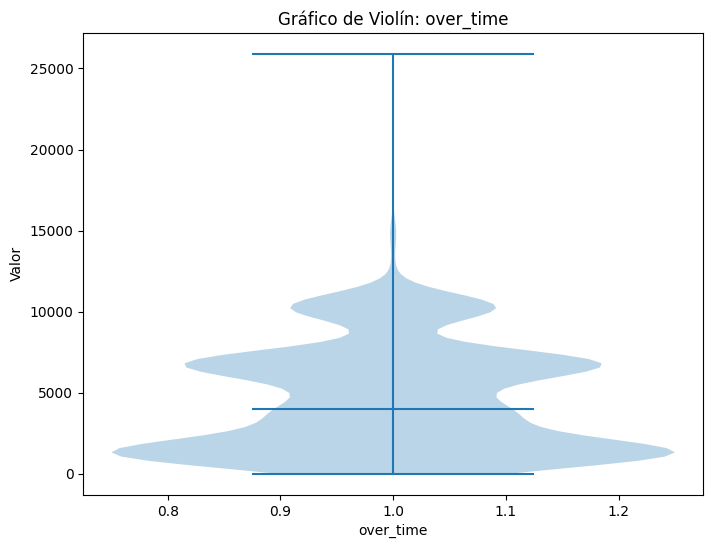

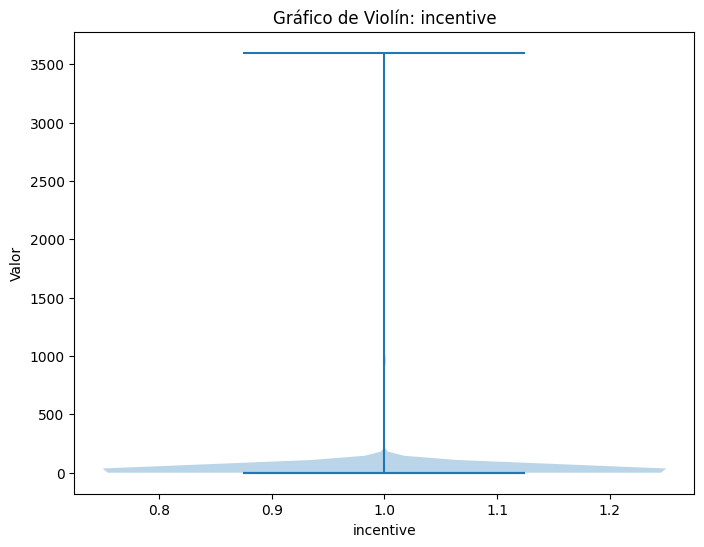

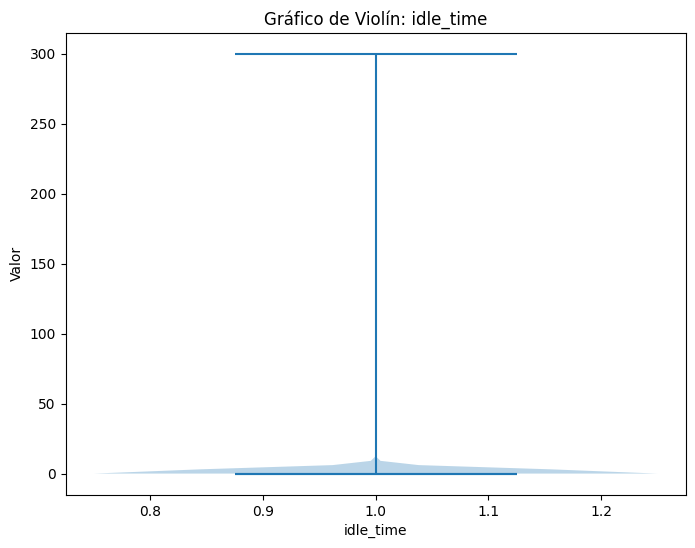

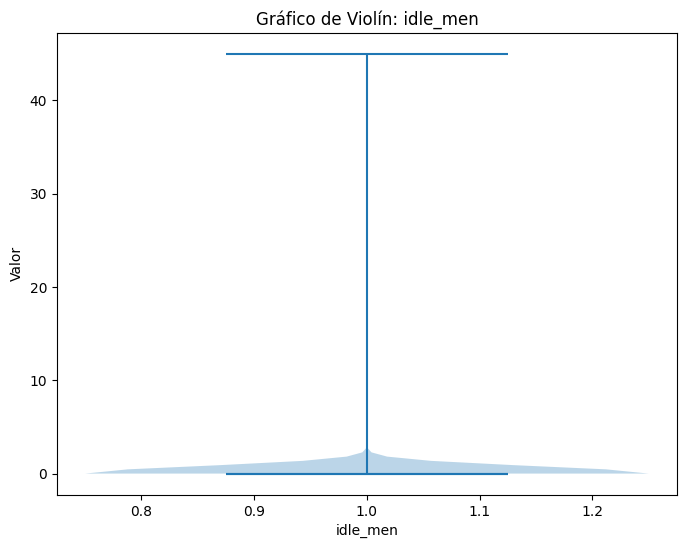

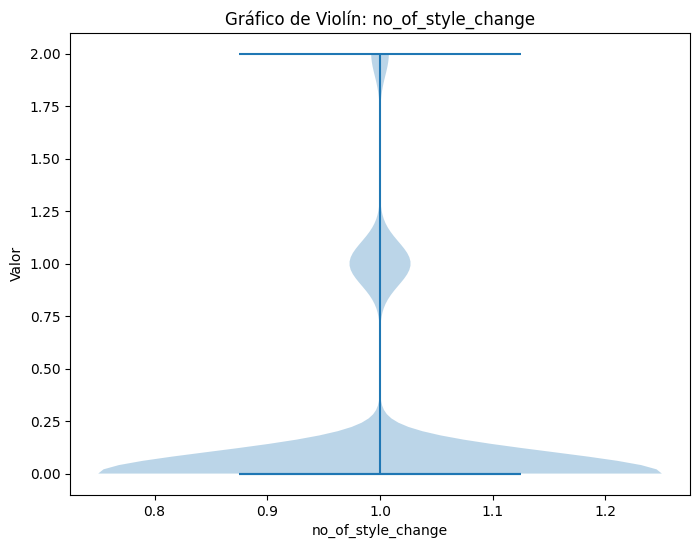

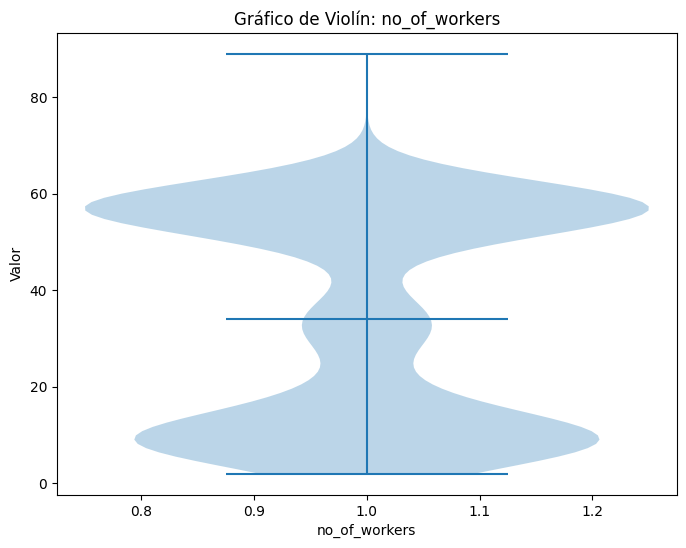

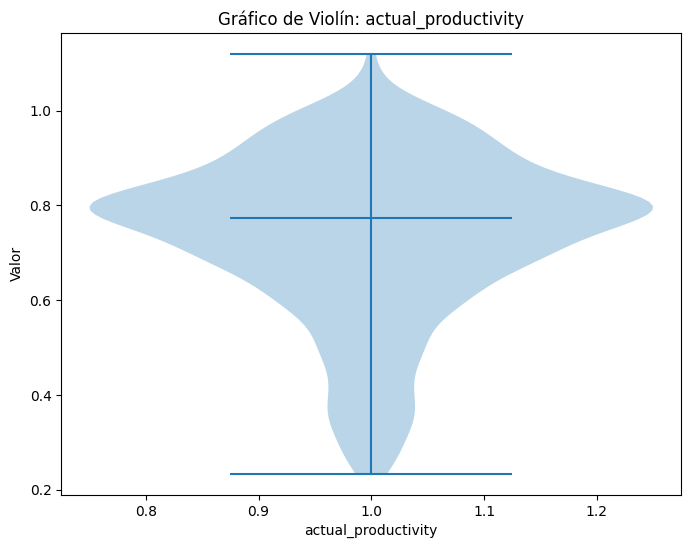

In [18]:
for column in numeric_variables.columns:
    if column != "team":
        plt.figure(figsize=(8, 6))
        plt.violinplot(data[column], showmeans=False, showmedians=True)
        plt.title(f'Gráfico de Violín: {column}')
        plt.xlabel(column)
        plt.ylabel('Valor')
        plt.show()

Tendencias entre variables de entrada y respuesta

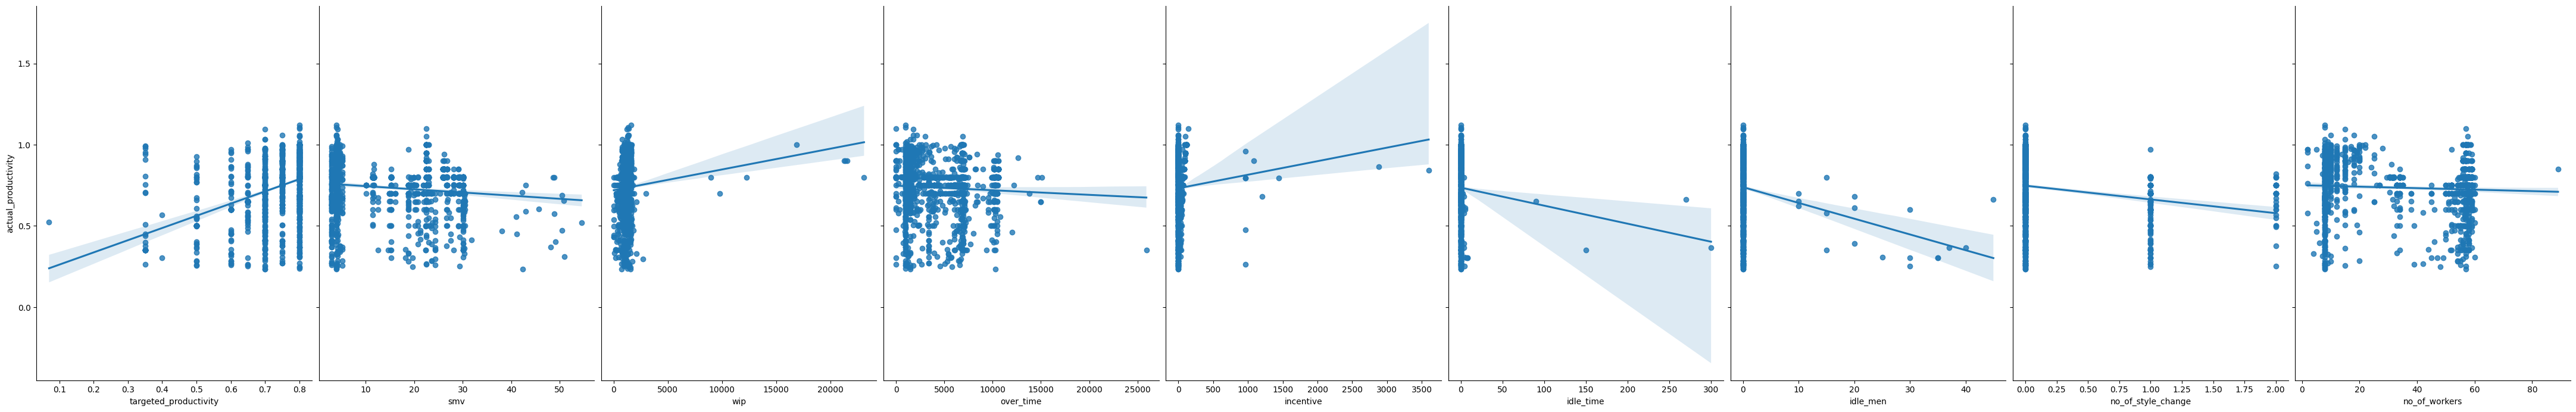

In [19]:
sns.pairplot(data, x_vars=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')

Algunas visualizaciones de interés

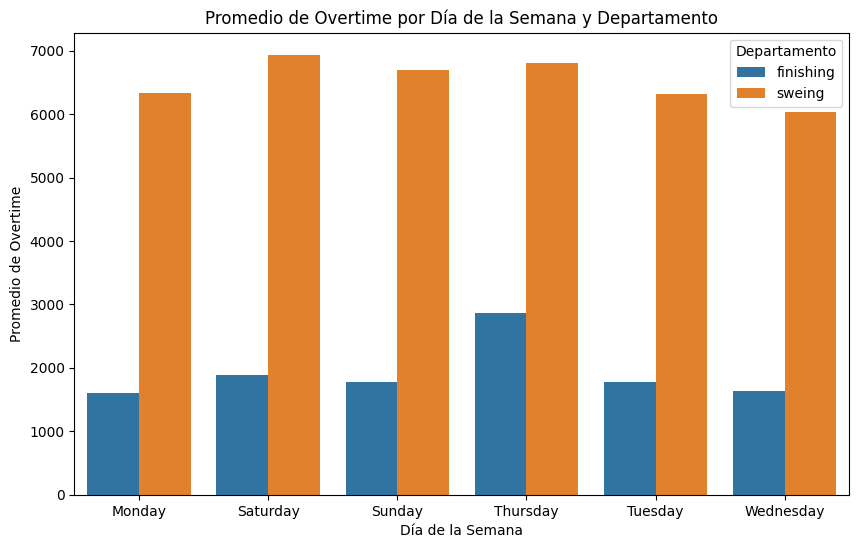

In [20]:
# Agrupar los datos por departamento y día de la semana y calcular el promedio de overtime
grouped_data = data.groupby(['department', 'day'])['over_time'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='over_time', hue='department', data=grouped_data)
plt.title('Promedio de Overtime por Día de la Semana y Departamento')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Overtime')
plt.legend(title='Departamento')
plt.show()

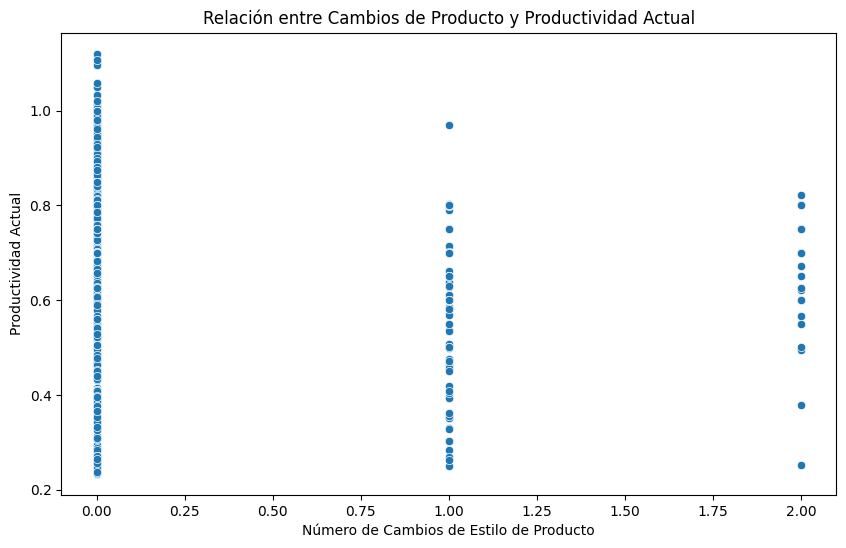

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='no_of_style_change', y='actual_productivity')
plt.title('Relación entre Cambios de Producto y Productividad Actual')
plt.xlabel('Número de Cambios de Estilo de Producto')
plt.ylabel('Productividad Actual')
plt.show()